In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [64]:
dataframe = pd.read_csv('sales_data.csv')
dataframe

,Unnamed: 0,City,Country,Customer.ID,Customer.Name,Discount,Market,Order.Date,Order.ID,Order.Priority,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,07-01-2011,CA-2011-130813,High,...,19,Consumer,09-01-2011,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,21-01-2011,CA-2011-148614,Medium,...,19,Consumer,26-01-2011,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,05-08-2011,CA-2011-118962,Medium,...,21,Consumer,09-08-2011,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,05-08-2011,CA-2011-118962,Medium,...,111,Consumer,09-08-2011,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,29-09-2011,CA-2011-146969,High,...,6,Consumer,03-10-2011,Standard Class,1.32,California,Paper,2011,North America,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,03-12-2014,CA-2014-109701,High,...,69,Corporate,04-12-2014,Same Day,5.15,California,Binders,2014,North America,49
51286,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,03-12-2014,CA-2014-109701,High,...,9,Corporate,04-12-2014,Same Day,0.44,California,Binders,2014,North America,49
51287,Office Supplies,Los Angeles,United States,HR-147704,Hallie Redmond,0.2,US,18-12-2014,CA-2014-106964,Medium,...,12,Home Office,21-12-2014,First Class,0.31,California,Binders,2014,North America,51
51288,Office Supplies,Los Angeles,United States,RM-196754,Robert Marley,0.2,US,25-12-2014,CA-2014-145219,Critical,...,90,Home Office,26-12-2014,First Class,15.95,California,Binders,2014,North America,52


In [65]:
print('Number of rows and columns in dataset : ')
dataframe.shape

Number of rows and columns in dataset : 


(51290, 26)

In [11]:
print('\nDatatype and null count of dataset : \n')
dataframe.info()


Datatype and null count of dataset : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   Order.Date      51290 non-null  object 
 8   Order.ID        51290 non-null  object 
 9   Order.Priority  51290 non-null  object 
 10  Product.ID      51290 non-null  object 
 11  Product.Name    51290 non-null  object 
 12  Profit          51290 non-null  float64
 13  Quantity        51290 non-null  int64  
 14  Region          51290 non-null  object 
 15  Row.ID          51290 non-null  int64  
 16  Sales           51290 non-null  int6

In [7]:
print('\nNumber of null values in each column : \n')
df.isnull().sum()


Number of null values in each column : 



Unnamed: 0        0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

In [12]:
# Remove duplicates using drop_duplicates()
print('\nNumber of duplicated rows before removing duplicated rows : \n' , dataframe.duplicated().sum())

dataframe = dataframe.drop_duplicates()

print('\nNumber of duplicated rows after removing duplicated rows : \n' , dataframe.duplicated().sum())


Number of duplicated rows before removing duplicated rows : 
 0

Number of duplicated rows after removing duplicated rows : 
 0


In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Order.Date is in datetime format
dataframe['Order.Date'] = pd.to_datetime(dataframe['Order.Date'])

# Group by month and calculate total sales
monthly_sales = dataframe.groupby(dataframe['Order.Date'].dt.to_period('M'))['Sales'].sum()

# Plotting
monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


ValueError: time data "21-01-2011" doesn't match format "%m-%d-%Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [50]:
# Fill missing values using appropriate strategies like the mean or median
# Postal Code is having 806 missing values therefore filling them with mean

print('\nNumber of missing values in  : ', dataframe['Postal Code'].isnull().sum())
print('\nNumber of missing values in  : ', dataframe['Postal Code'].isnull().sum())
print('\nNumber of missing values in  : ', dataframe['Postal Code'].isnull().sum())
print('\nPostal Code before filling missing values : \n', dataframe['Postal Code'].head())

dataframe['Postal Code'] = dataframe['Postal Code'].fillna(dataframe['Postal Code'].mean())

print('\n\nPostal Code after filling missing values : \n', dataframe['Postal Code'].head())

KeyError: 'Postal Code'

In [55]:
print('\nDatatypes of date columns  ')
print('Order.Date : ', dataframe['Order.Date'].dtypes)
print('Ship.Date : ', dataframe['Order.Date'].dtypes)
dataframe['Order.Date'] = pd.to_datetime( dataframe['Order.Date'])
dataframe['Ship.Date'] = pd.to_datetime( dataframe['Ship.Date'])

print('\nConverting datatypes of date columns  ')
print('Order.Date : ', dataframe['Order.Date'].dtypes)
print('Ship.Date : ', dataframe['Ship.Date'].dtypes)


Datatypes of date columns  
Order.Date :  object
Ship.Date :  object


ValueError: time data "21-01-2011" doesn't match format "%m-%d-%Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Order.Date is in datetime format
dataframe['Order.Date'] = pd.to_datetime(dataframe['Order.Date'])

# Group by month and calculate total sales
monthly_sales = dataframe.groupby(dataframe['Order.Date'].dt.to_period('M'))['Sales'].sum()

# Plotting
monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


ValueError: time data "21-01-2011" doesn't match format "%m-%d-%Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [62]:
# Time series graphs to observe trends in Sales over time
 
monthly_sales = dataframe.groupby(dataframe['Order.Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trend')
plt.xlabel("Month")
plt.ylabel(" Total Sales")
plt.grid(True) 

plt.show()

AttributeError: Can only use .dt accessor with datetimelike values

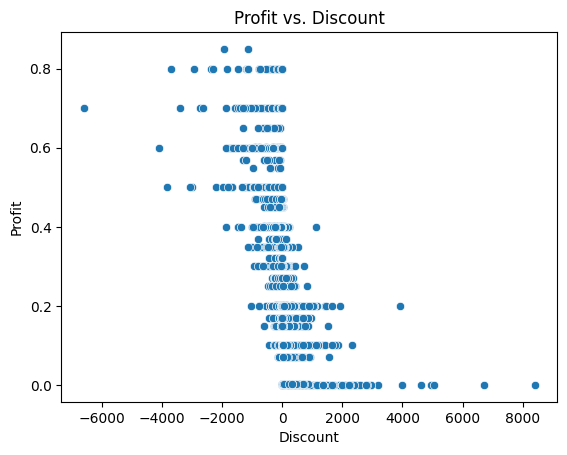

In [24]:

sns.scatterplot(x='Profit', y='Discount', data=dataframe)
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Profit vs. Discount')
plt.show()

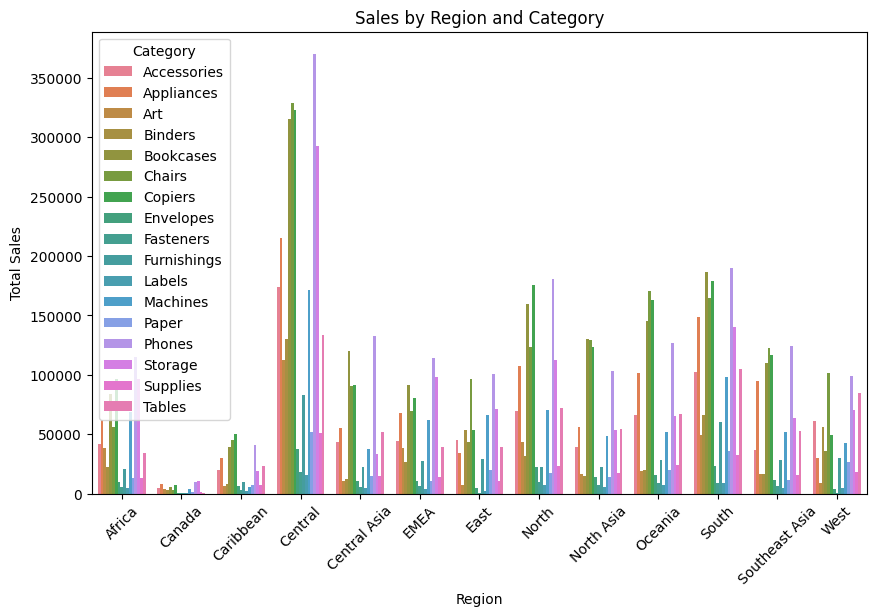

In [26]:
# Visualize sales distribution by Region and Category using bar plots or pie charts


# Calculate total sales by Region and Category
sales_by_region_category = dataframe.groupby(['Region', 'Sub.Category'])['Sales'].sum().reset_index()

# Bar plot: Sales by Region and Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', hue='Sub.Category', data=sales_by_region_category)
plt.title('Sales by Region and Category')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.show()

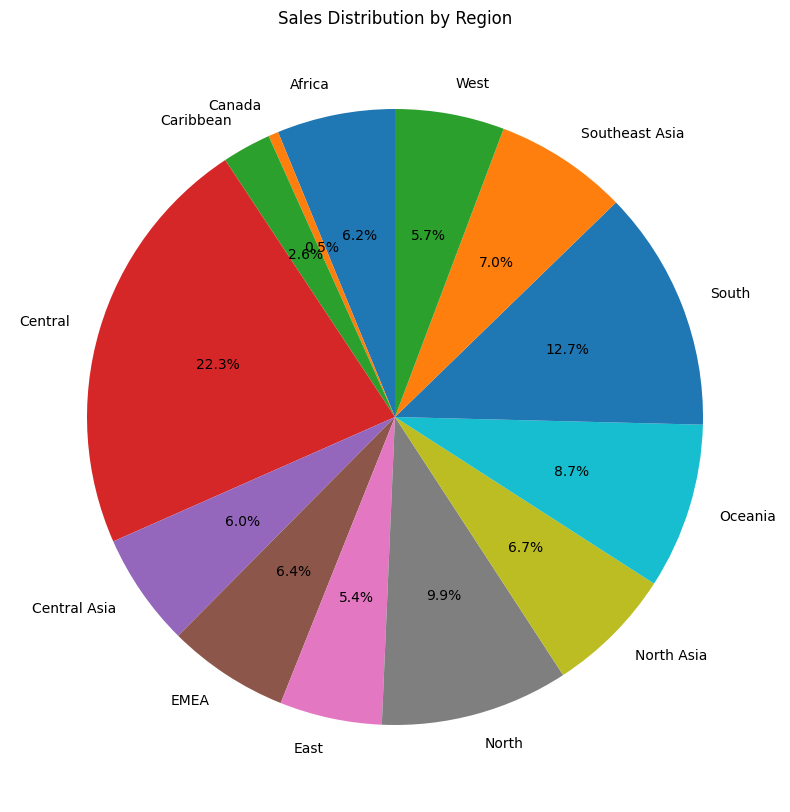

In [29]:
plt.figure(figsize=(110, 10))
region_sales = dataframe.groupby('Region')['Sales'].sum()
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Region')
plt.show()

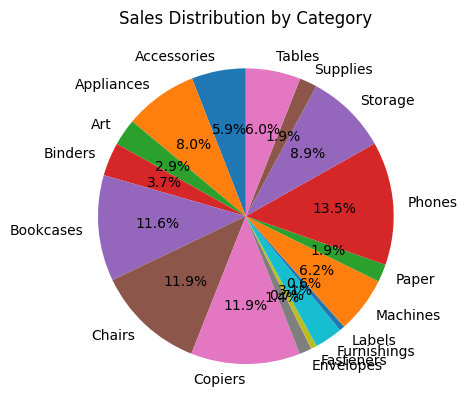

In [32]:
# Pie chart: Sales by Category

category_sales = dataframe.groupby('Sub.Category')['Sales'].sum()
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Category')
plt.show()

In [33]:
# Step 1 : Handling outliers

# Creating new column z-scores
dataframe['z-scores'] = (dataframe['Sales']  -  dataframe['Sales'].mean()) / dataframe['Sales'].std()

# Define bounds
lower_limit = dataframe['Sales'].mean() - 3*dataframe['Sales'].std()
upper_limit = dataframe['Sales'].mean() + 3*dataframe['Sales'].std()

# Find outliers
z_score_outliers = dataframe[(dataframe['Sales'] < lower_limit) | (dataframe['Sales'] > upper_limit)]

print("Outliers in 'Sales' (using Z-scores Technique):")
z_score_outliers

Outliers in 'Sales' (using Z-scores Technique):


,Unnamed: 0,City,Country,Customer.ID,Customer.Name,Discount,Market,Order.Date,Order.ID,Order.Priority,...,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum,z-scores
361,Office Supplies,San Francisco,United States,KL-166454,Ken Lonsdale,0.0,US,25-07-2011,CA-2011-143917,High,...,Consumer,27-07-2011,Second Class,16.77,California,Supplies,2011,North America,31,16.288015
417,Office Supplies,San Francisco,United States,EH-137654,Edward Hooks,0.0,US,14-03-2013,CA-2013-136301,Critical,...,Corporate,16-03-2013,Second Class,56.09,California,Supplies,2013,North America,11,9.570992
663,Office Supplies,Burbank,United States,SC-200504,Sample Company A,0.0,US,18-03-2011,US-2011-131275,Medium,...,Home Office,24-03-2011,Standard Class,93.90,California,Storage,2011,North America,12,3.301087
803,Office Supplies,Brentwood,United States,RW-195404,Rick Wilson,0.0,US,18-08-2014,CA-2014-166093,Medium,...,Corporate,25-08-2014,Standard Class,173.07,California,Appliances,2014,North America,34,4.658848
1137,Office Supplies,New York City,United States,JD-161504,Justin Deggeller,0.0,US,20-11-2014,CA-2014-168858,High,...,Corporate,24-11-2014,Standard Class,235.83,New York,Appliances,2014,North America,47,4.632185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51097,Technology,Los Angeles,United States,PS-190454,Penelope Sewall,0.2,US,09-05-2014,CA-2014-133865,High,...,Home Office,13-05-2014,Standard Class,400.60,California,Copiers,2014,North America,19,6.385790
51116,Technology,Los Angeles,United States,RM-196754,Robert Marley,0.2,US,25-12-2014,CA-2014-145219,Critical,...,Home Office,26-12-2014,First Class,334.15,California,Copiers,2014,North America,52,5.401310
51153,Technology,Los Angeles,United States,KF-162854,Karen Ferguson,0.2,US,11-03-2013,CA-2013-159016,High,...,Home Office,12-03-2013,First Class,714.66,California,Phones,2013,North America,11,8.024538
51173,Technology,Los Angeles,United States,GK-146204,Grace Kelly,0.2,US,26-12-2013,US-2013-116729,Medium,...,Corporate,29-12-2013,First Class,429.66,California,Phones,2013,North America,52,4.777806


In [34]:
# Removing outliers
dataframe = dataframe[abs(dataframe['z-scores']) <= 3]
dataframe

,Unnamed: 0,City,Country,Customer.ID,Customer.Name,Discount,Market,Order.Date,Order.ID,Order.Priority,...,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum,z-scores
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,07-01-2011,CA-2011-130813,High,...,Consumer,09-01-2011,Second Class,4.37,California,Paper,2011,North America,2,-0.466599
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,21-01-2011,CA-2011-148614,Medium,...,Consumer,26-01-2011,Standard Class,0.94,California,Paper,2011,North America,4,-0.466599
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,05-08-2011,CA-2011-118962,Medium,...,Consumer,09-08-2011,Standard Class,1.81,California,Paper,2011,North America,32,-0.462497
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,05-08-2011,CA-2011-118962,Medium,...,Consumer,09-08-2011,Standard Class,4.59,California,Paper,2011,North America,32,-0.277907
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,29-09-2011,CA-2011-146969,High,...,Consumer,03-10-2011,Standard Class,1.32,California,Paper,2011,North America,40,-0.493262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,03-12-2014,CA-2014-109701,High,...,Corporate,04-12-2014,Same Day,5.15,California,Binders,2014,North America,49,-0.364049
51286,Office Supplies,Los Angeles,United States,AM-103604,Alice McCarthy,0.2,US,03-12-2014,CA-2014-109701,High,...,Corporate,04-12-2014,Same Day,0.44,California,Binders,2014,North America,49,-0.487109
51287,Office Supplies,Los Angeles,United States,HR-147704,Hallie Redmond,0.2,US,18-12-2014,CA-2014-106964,Medium,...,Home Office,21-12-2014,First Class,0.31,California,Binders,2014,North America,51,-0.480956
51288,Office Supplies,Los Angeles,United States,RM-196754,Robert Marley,0.2,US,25-12-2014,CA-2014-145219,Critical,...,Home Office,26-12-2014,First Class,15.95,California,Binders,2014,North America,52,-0.320978


In [35]:
# Step 2 : Creating and training model

# Separate features (X) and target variable (y)
X = dataframe[['Discount', 'Profit']] 
y = dataframe['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")

Model coefficients: [57.15660677  0.85383219]
Model intercept: 173.59317459016117


In [36]:
# Step 3 : Print some predictions

Sales_prediction = pd.DataFrame({'Actual Sales':y_test[:10].values , 
                                 'Predicted Sales': np.round(y_pred[:10], 2)})
Sales_prediction

,Actual Sales,Predicted Sales
0,116,187.43
1,183,215.73
2,184,172.89
3,38,189.96
4,138,211.30
5,1303,418.27
6,13,178.90
7,18,190.85
8,254,244.35
9,190,244.76


In [37]:
new_data = pd.DataFrame({
    'Discount': [0.15, 0.2, 0.1, 0.05, 0.25, 0.18, 0.12, 0.08, 0.3, 0.1],
    'Profit': [50, 45, 60, 55, 35, 58, 62, 42, 40, 65]
}) 
predicted_sales = model.predict(new_data)
print(f"Predicted Sales:") 
pd.DataFrame({'Discount': new_data['Discount'],'Profit': new_data['Profit'], 'Predicted Sales':predicted_sales})

Predicted Sales:


,Discount,Profit,Predicted Sales
0,0.15,50,224.858275
1,0.20,45,223.446945
2,0.10,60,230.538767
3,0.05,55,223.411776
4,0.25,35,217.766453
5,0.18,58,233.403631
6,0.12,62,233.389563
7,0.08,42,214.026655
8,0.30,40,224.893444
9,0.10,65,234.807928


In [38]:
# Step 4 : Evaluate the Model

print('Mean Absolute Error : ' , mean_absolute_error(y_test, y_pred))
print('Mean Squared Error : ' , mean_squared_error(y_test, y_pred))
print('R-squared : ' , r2_score(y_test, y_pred))

Mean Absolute Error :  174.6440994782905
Mean Squared Error :  69249.90259857502
R-squared :  0.10038048594492055


In [39]:
# Step 5 : Example data for future predictions
future_data = pd.DataFrame({
    'Discount': [0.1, 0.2, 0.3],
    'Profit': [500, 1000, 1500]
})

# Predict Sales
future_data['Predicted Sales'] = model.predict(future_data)
future_data

,Discount,Profit,Predicted Sales
0,0.1,500,606.224932
1,0.2,1000,1038.856689
2,0.3,1500,1471.488446


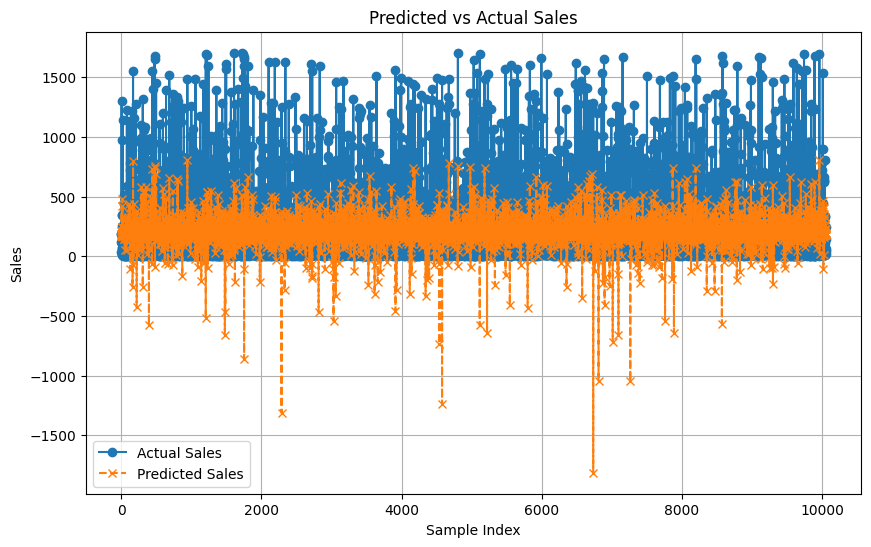

In [40]:
# Step 6 : Visualize Predicted vs Actual Sales

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Sales', marker='o')
plt.plot(y_pred, label='Predicted Sales', marker='x', linestyle='--')
plt.title("Predicted vs Actual Sales")
plt.xlabel("Sample Index")
plt.ylabel("Sales")
plt.legend()
plt.grid()
plt.show()
# Gaps between lines highlight areas of prediction error.

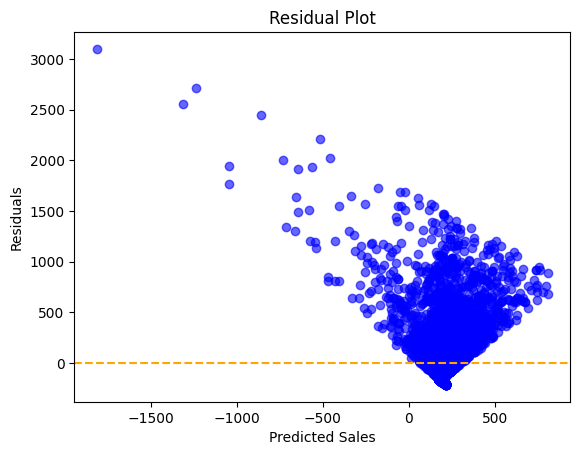

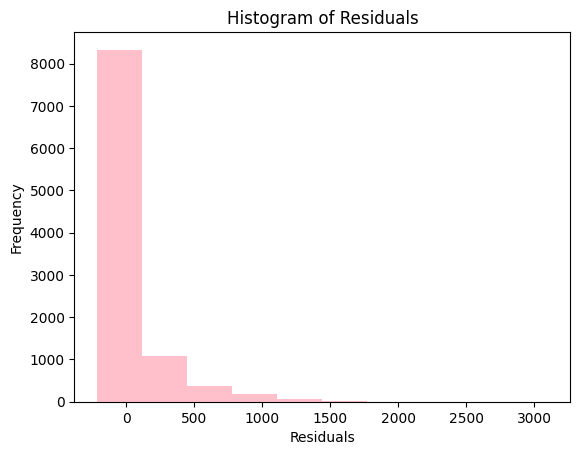

In [42]:
# Step 7 : Visualize residuals

residuals = y_test - y_pred

plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(0, color='orange', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.show()
# Random scatter around the red line (zero) = Model is well-fitted.



plt.hist(residuals,  color='pink')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()
# histogram resembles a bell curve therefore the residuals are approximately normal.

In [43]:
# Removing z-score column
dataframe = dataframe.drop('z-scores', axis=1)